# 1.Packages Imports

In [1]:
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os
import json
from pprint import pprint

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical

2023-10-26 02:40:58.627042: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-26 02:40:58.833432: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-26 02:40:58.835062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-26 02:40:59.982458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 2.Images Loading

In [2]:
# Assuming a standard dimension of 128*128 for all images
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128

In [3]:
def load_imgs(paths:list) -> dict:
    """
    Load images from path and return a list of images

    Parameters:
    -----------
    paths: list
        List of paths to images

    Returns:
    --------
    imgs: dict
        Dictionary of lists of images
    """
    imgs = {}
    for path in paths:
        folder = path.split('/')[-1]
        imgs_names = os.listdir(path)
        imgs[folder] = {}
        for img_name in imgs_names:
            img = imread(os.path.join(path, img_name))
            img = resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
            imgs[folder][img_name] = img
    return imgs

In [4]:
folders = ["./a3_dataset/img/Cleavers",
            "./a3_dataset/img/Common_Chickweed",
            "./a3_dataset/img/Maize",
            "./a3_dataset/img/Shepherds_Purse",]

# Load the data
data = load_imgs(folders)
pprint(data)

{'Cleavers': {'0.png': array([[[0.32264572, 0.24029278, 0.16222044],
        [0.33278186, 0.25153186, 0.17754768],
        [0.3266975 , 0.25223078, 0.18237783],
        ...,
        [0.32464384, 0.27652516, 0.21146982],
        [0.32451938, 0.27069451, 0.20400199],
        [0.34541399, 0.28303653, 0.21993241]],

       [[0.33338503, 0.25160941, 0.17709961],
        [0.3338848 , 0.25366019, 0.17915039],
        [0.32867647, 0.25563725, 0.18178807],
        ...,
        [0.31672124, 0.26616307, 0.19539101],
        [0.32665441, 0.27285539, 0.20406039],
        [0.36366805, 0.30184206, 0.23352099]],

       [[0.33579772, 0.25846929, 0.18400257],
        [0.34759019, 0.27455097, 0.20070178],
        [0.34022767, 0.27126225, 0.19512963],
        ...,
        [0.31651061, 0.26923637, 0.19080499],
        [0.3255103 , 0.27521063, 0.19586014],
        [0.32271465, 0.2651348 , 0.18666035]],

       ...,

       [[0.31432675, 0.2810116 , 0.23003121],
        [0.3008722 , 0.27041877, 0.21943838],

In [5]:
df_list = []
categories = {"Cleavers": 0,
                "Common_Chickweed": 1,
                "Maize": 2,
                "Shepherds_Purse": 3}
                
for category, images in data.items():
    for name, image in images.items():
        df = pd.DataFrame(image.flatten()).T
        df["target"] = categories[category]
        df["name"] = name
        df_list.append(df)

data = pd.concat(df_list, axis=0)
data.reset_index(drop=True, inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,49144,49145,49146,49147,49148,49149,49150,49151,target,name
0,0.322646,0.240293,0.162220,0.332782,0.251532,0.177548,0.326697,0.252231,0.182378,0.309246,...,0.229966,0.160622,0.321575,0.254409,0.184188,0.340634,0.277354,0.214434,0,0.png
1,0.323292,0.210059,0.138915,0.318074,0.214035,0.143621,0.325350,0.226995,0.156270,0.307952,...,0.247990,0.187800,0.324816,0.249790,0.190256,0.320963,0.239925,0.181006,0,1.png
2,0.335612,0.248386,0.158190,0.332226,0.245692,0.153338,0.319327,0.242975,0.151750,0.300095,...,0.373735,0.283477,0.442436,0.392833,0.291427,0.466435,0.409632,0.316353,0,10.png
3,0.339420,0.253906,0.201084,0.307205,0.224534,0.156346,0.289388,0.200911,0.121873,0.273303,...,0.153815,0.156693,0.157781,0.145406,0.156868,0.145009,0.124379,0.137231,0,100.png
4,0.234223,0.170838,0.126211,0.236991,0.175235,0.123455,0.235990,0.177161,0.119510,0.245311,...,0.268191,0.206148,0.338468,0.276096,0.208205,0.349792,0.291238,0.226633,0,101.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.286882,0.216881,0.185131,0.299541,0.235631,0.201073,0.324773,0.270657,0.238191,0.357427,...,0.269479,0.231158,0.342051,0.298944,0.262654,0.341416,0.298468,0.259053,3,247.png
996,0.292770,0.281621,0.292741,0.282016,0.273836,0.281592,0.283846,0.275810,0.283172,0.286275,...,0.376348,0.297220,0.432859,0.378968,0.296365,0.425012,0.369802,0.284143,3,248.png
997,0.290270,0.207917,0.133405,0.301654,0.223146,0.140870,0.301647,0.223514,0.141238,0.299969,...,0.149754,0.082030,0.242624,0.152896,0.097237,0.239370,0.141484,0.090426,3,249.png
998,0.156203,0.097211,0.076790,0.169472,0.110480,0.080875,0.189880,0.128073,0.096773,0.208491,...,0.239553,0.178707,0.300317,0.242145,0.174152,0.313865,0.258802,0.184453,3,25.png


# 3.Basic Transfer Learning

### 3.1 Classification Network

In [ ]:
X_train, X_rest, y_train, y_rest = train_test_split(data.drop(["target", "name"], axis=1), 
                                                    data["target"], 
                                                    test_size=0.2, 
                                                    random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_rest,
                                                y_rest,
                                                test_size=0.5,
                                                random_state=42)

X_train = X_train.values.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)
X_val = X_val.values.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)
X_test = X_test.values.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)

y_train = to_categorical(y_train, num_classes=4)
y_val = to_categorical(y_val, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [ ]:
# y_train.shape, y_val.shape, y_test.shape
X_train.shape, X_val.shape, X_test.shapedatamse_data.keys()sets

((800, 128, 128, 3), (100, 128, 128, 3), (100, 128, 128, 3))

In [103]:
base_model = VGG16(weights='imagenet', 
                    include_top=False, 
                    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))

# Create custom model
class_model = models.Sequential()

# Freeze the layers from VGG-16 model and add the first two blocks
for layer in base_model.layers[:7]:
    layer.trainable = False
    class_model.add(layer)

class_model.add(layers.Flatten())
class_model.add(layers.Dense(128, activation='relu'))
class_model.add(layers.Dense(64, activation='relu'))
class_model.add(layers.Dense(32, activation='relu'))
class_model.add(layers.Dense(4, activation='softmax'))  # 4 classes


# Compile the model
class_model.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])


In [104]:
class_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0         
                                                                 
 flatten_8 (Flatten)         (None, 131072)           

In [105]:
class_history = class_model.fit(X_train,
                                y_train,
                                epochs=10,
                                batch_size=32,
                                validation_data=(X_val, y_val))

Epoch 1/10
25/25 [==============================] - 19s 724ms/step - loss: 198.7815 - accuracy: 0.2550 - val_loss: 54.7242 - val_accuracy: 0.1800
Epoch 2/10
25/25 [==============================] - 17s 677ms/step - loss: 19.0683 - accuracy: 0.4600 - val_loss: 10.7444 - val_accuracy: 0.5500
Epoch 3/10
25/25 [==============================] - 17s 670ms/step - loss: 6.8756 - accuracy: 0.5900 - val_loss: 6.8770 - val_accuracy: 0.5800
Epoch 4/10
25/25 [==============================] - 17s 663ms/step - loss: 1.2689 - accuracy: 0.8587 - val_loss: 9.8106 - val_accuracy: 0.5100
Epoch 5/10
25/25 [==============================] - 18s 708ms/step - loss: 0.8040 - accuracy: 0.8925 - val_loss: 9.0048 - val_accuracy: 0.6100
Epoch 6/10
25/25 [==============================] - 17s 671ms/step - loss: 0.3430 - accuracy: 0.9450 - val_loss: 8.3624 - val_accuracy: 0.4600
Epoch 7/10
25/25 [==============================] - 17s 669ms/step - loss: 4.0854 - accuracy: 0.7575 - val_loss: 26.6115 - val_accuracy: 

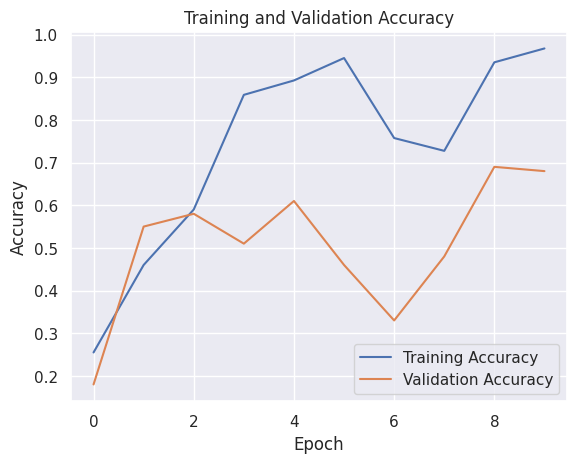

In [106]:
# Plot learning curves
plt.figure()
plt.plot(class_history.history['accuracy'], label='Training Accuracy')
plt.plot(class_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [107]:
def plot_cm(cm, labels, data_type:str='training'):
    # Plot the confusion matrix
    _, ax = plt.subplots(figsize=(10, 7))
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title(f'Confusion matrix for {data_type} data')
    plt.show()

In [108]:
# Get predictions
train_preds = np.argmax(class_model.predict(X_train), axis=1)
val_preds = np.argmax(class_model.predict(X_val), axis=1)
test_preds = np.argmax(class_model.predict(X_test), axis=1)

4/4 [==============================] - 1s 287ms/step


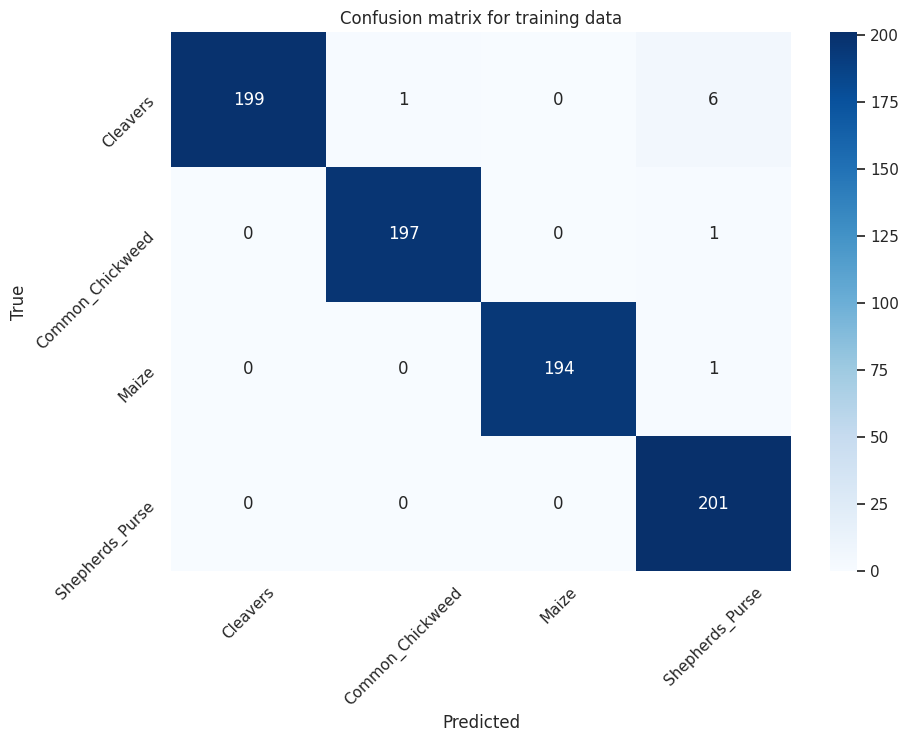

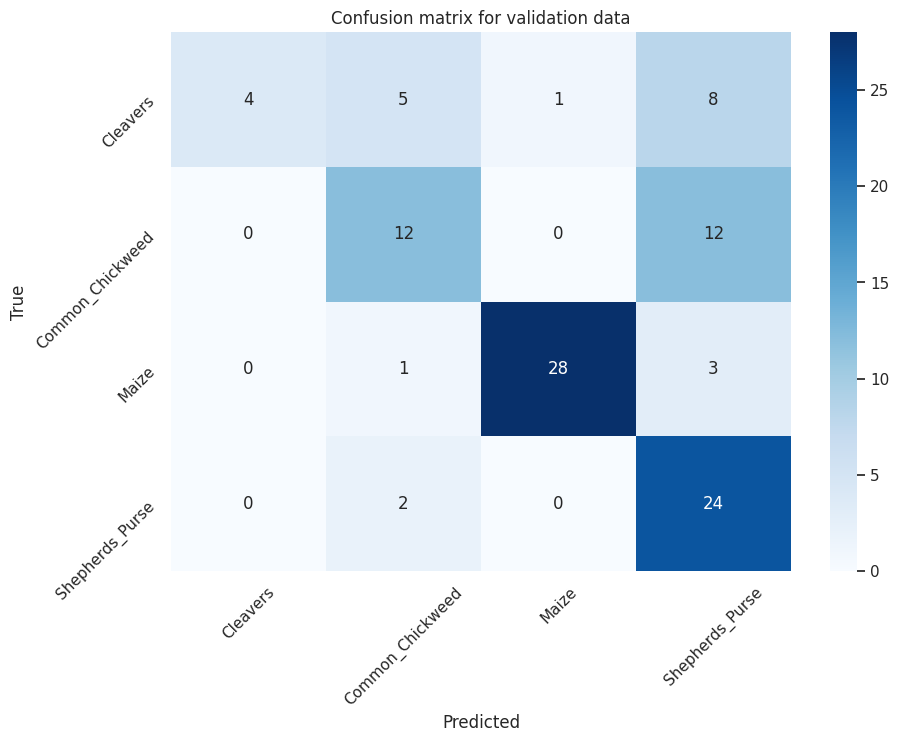

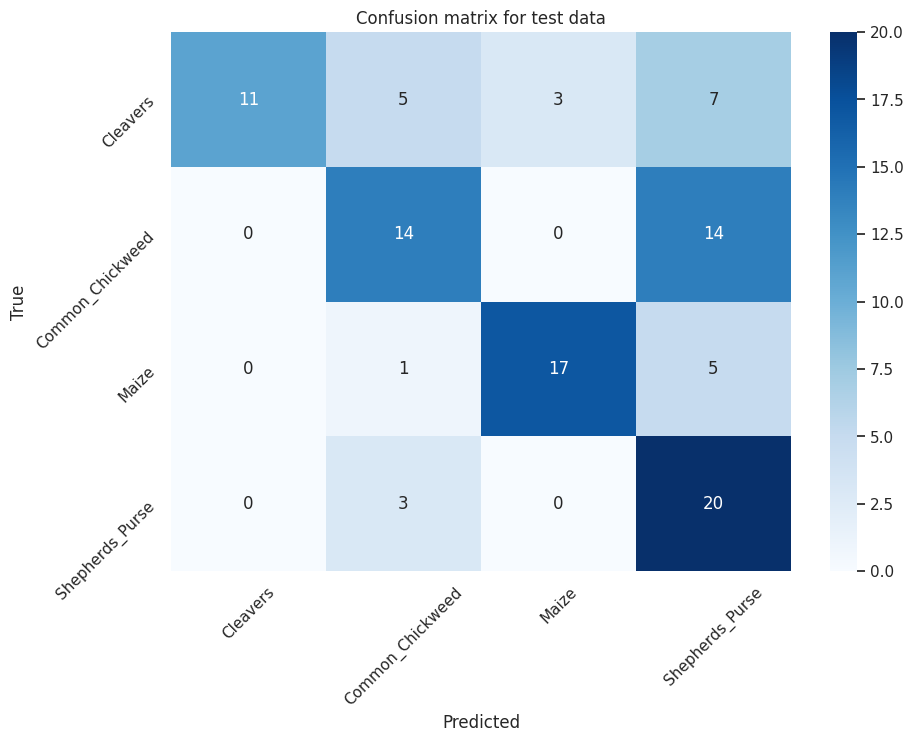

In [110]:
# Plot confusion matrices
cm_train = confusion_matrix(np.argmax(y_train, axis=1), train_preds)
cm_val = confusion_matrix(np.argmax(y_val, axis=1), val_preds)
cm_test = confusion_matrix(np.argmax(y_test, axis=1), test_preds)

plot_cm(cm_train, labels=categories.keys(), data_type='training')
plot_cm(cm_val, labels=categories.keys(), data_type='validation')
plot_cm(cm_test, labels=categories.keys(), data_type='test')

### 3.2 Regression Network

In [6]:
def load_labels_from_json(json_file_path):
    """
    Load the bounding box labels from the given JSON file.

    Parameters:
    - json_file_path: path to the JSON file

    Returns:
    - labels_dict: dictionary with image names as keys and a tuple (height, width) as values
    """
    # Initialize an empty dictionary to store the parsed labels
    labels_dict = {}

    # Load the JSON file
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    # Loop through each class in the JSON data
    for class_name, images in data.items():
        labels = {}
        for image_name, bbox in images.items():
            # Extract the bounding box height and width
            data[class_name][image_name] = tuple(bbox.values())
        #     # Store the height and width in the labels dictionary with image name as the key
        #     labels[image_name] = (height, width)
        
        # labels_dict[class_name] = labels
    
    return data

# Example usage
json_file_path = "./a3_dataset/bbox.json"
labels = load_labels_from_json(json_file_path)
pprint(labels)


{'Cleavers': {'0': (124, 106),
              '1': (250, 209),
              '10': (174, 80),
              '100': (312, 366),
              '101': (190, 81),
              '102': (395, 368),
              '103': (300, 449),
              '104': (292, 210),
              '105': (151, 262),
              '106': (73, 133),
              '107': (180, 127),
              '108': (256, 409),
              '109': (144, 214),
              '11': (334, 208),
              '110': (193, 259),
              '111': (62, 107),
              '112': (174, 155),
              '113': (86, 36),
              '114': (238, 282),
              '115': (124, 121),
              '116': (342, 435),
              '117': (142, 73),
              '118': (289, 152),
              '119': (108, 143),
              '12': (554, 343),
              '120': (116, 184),
              '121': (62, 129),
              '122': (146, 389),
              '123': (425, 583),
              '124': (88, 98),
              '125': (114, 

In [7]:
# Function to normalize the height and width
def normalize_bbox_values(data):
    normalized_data = {}
    for class_name, images in data.items():
        normalized_data[class_name] = {}
        for image_name, bbox in images.items():
            image =  imread(os.path.join("./a3_dataset/img", class_name, f"{image_name}.png"))
            image_height, image_width, _ = image.shape
            width, height = bbox
            normalized_width = width / image_width
            normalized_height = height / image_height
            normalized_data[class_name][image_name] = (normalized_width, normalized_height)
    return normalized_data

# Normalize the labels
normalized_labels = normalize_bbox_values(labels)
pprint(normalized_labels)


{'Cleavers': {'0': (0.8857142857142857, 0.7571428571428571),
              '1': (0.9398496240601504, 0.7857142857142857),
              '10': (0.9157894736842105, 0.42105263157894735),
              '100': (0.8167539267015707, 0.9581151832460733),
              '101': (0.9223300970873787, 0.3932038834951456),
              '102': (0.9610705596107056, 0.8953771289537713),
              '103': (0.6451612903225806, 0.9655913978494624),
              '104': (0.948051948051948, 0.6818181818181818),
              '105': (0.5431654676258992, 0.9424460431654677),
              '106': (0.4899328859060403, 0.8926174496644296),
              '107': (0.9183673469387755, 0.6479591836734694),
              '108': (0.6023529411764705, 0.9623529411764706),
              '109': (0.6260869565217392, 0.9304347826086956),
              '11': (0.9542857142857143, 0.5942857142857143),
              '110': (0.7018181818181818, 0.9418181818181818),
              '111': (0.5040650406504065, 0.8699186991869918)

In [8]:
df_list = []

for category, cat_labels in normalized_labels.items():
    for name, label in cat_labels.items():
        df = pd.DataFrame()
        df["width"] = [label[0]]
        df["height"] = [label[1]]
        df["target"] = categories[category]
        df["name"] = f"{name}.png"
        df_list.append(df)

labels_df = pd.concat(df_list, axis=0)
labels_df.reset_index(drop=True, inplace=True)
labels_df

,width,height,target,name
0,0.900634,0.966173,1,0.png
1,0.377682,0.931330,1,1.png
2,0.506329,0.797468,1,2.png
3,0.592233,0.844660,1,3.png
4,0.485656,0.967213,1,4.png
...,...,...,...,...
995,0.826531,0.967347,3,245.png
996,0.764706,0.558824,3,246.png
997,0.556522,0.860870,3,247.png
998,0.893333,0.893333,3,248.png


In [9]:
# Merge the labels and images dataframes
data_merged = pd.merge(data, labels_df, on=["name", "target"])
data_merged

,0,1,2,3,4,5,6,7,8,9,...,49146,49147,49148,49149,49150,49151,target,name,width,height
0,0.322646,0.240293,0.162220,0.332782,0.251532,0.177548,0.326697,0.252231,0.182378,0.309246,...,0.321575,0.254409,0.184188,0.340634,0.277354,0.214434,0,0.png,0.885714,0.757143
1,0.323292,0.210059,0.138915,0.318074,0.214035,0.143621,0.325350,0.226995,0.156270,0.307952,...,0.324816,0.249790,0.190256,0.320963,0.239925,0.181006,0,1.png,0.939850,0.785714
2,0.335612,0.248386,0.158190,0.332226,0.245692,0.153338,0.319327,0.242975,0.151750,0.300095,...,0.442436,0.392833,0.291427,0.466435,0.409632,0.316353,0,10.png,0.915789,0.421053
3,0.339420,0.253906,0.201084,0.307205,0.224534,0.156346,0.289388,0.200911,0.121873,0.273303,...,0.157781,0.145406,0.156868,0.145009,0.124379,0.137231,0,100.png,0.816754,0.958115
4,0.234223,0.170838,0.126211,0.236991,0.175235,0.123455,0.235990,0.177161,0.119510,0.245311,...,0.338468,0.276096,0.208205,0.349792,0.291238,0.226633,0,101.png,0.922330,0.393204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.286882,0.216881,0.185131,0.299541,0.235631,0.201073,0.324773,0.270657,0.238191,0.357427,...,0.342051,0.298944,0.262654,0.341416,0.298468,0.259053,3,247.png,0.556522,0.860870
996,0.292770,0.281621,0.292741,0.282016,0.273836,0.281592,0.283846,0.275810,0.283172,0.286275,...,0.432859,0.378968,0.296365,0.425012,0.369802,0.284143,3,248.png,0.893333,0.893333
997,0.290270,0.207917,0.133405,0.301654,0.223146,0.140870,0.301647,0.223514,0.141238,0.299969,...,0.242624,0.152896,0.097237,0.239370,0.141484,0.090426,3,249.png,0.879699,0.744361
998,0.156203,0.097211,0.076790,0.169472,0.110480,0.080875,0.189880,0.128073,0.096773,0.208491,...,0.300317,0.242145,0.174152,0.313865,0.258802,0.184453,3,25.png,0.863248,0.435897


In [10]:
X_train, X_rest, y_train, y_rest = train_test_split(data_merged.drop(["target", "name", "width", "height"], axis=1), 
                                                    data_merged[["width", "height"]], 
                                                    test_size=0.2, 
                                                    random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_rest,
                                                y_rest,
                                                test_size=0.5,
                                                random_state=42)

X_train = X_train.values.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)
X_val = X_val.values.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)
X_test = X_test.values.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)


In [11]:
y_train.shape, y_val.shape, y_test.shape  
# X_train.shape, X_val.shape, X_test.shape

((800, 2), (100, 2), (100, 2))

In [22]:
base_model = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))

# Create custom model
regre_model = models.Sequential()

# Freeze the layers from VGG-16 model and add the first two blocks
for layer in base_model.layers[:7]:
    layer.trainable = False
    regre_model.add(layer)

regre_model.add(layers.Flatten())
regre_model.add(layers.Dense(128, activation='tanh'))
regre_model.add(layers.Dense(64, activation='tanh'))
regre_model.add(layers.Dense(32, activation='tanh'))
regre_model.add(layers.Dense(2, activation='sigmoid'))  # 2 outputs for normalized height and width


# Compile the model
regre_model.compile(optimizer='adam', 
                    loss='mean_squared_error')

In [23]:
regre_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0         
                                                                 
 flatten_1 (Flatten)         (None, 131072)           

In [24]:
regre_history = regre_model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/10
25/25 [==============================] - 19s 730ms/step - loss: 0.0522 - val_loss: 0.0368
Epoch 2/10
25/25 [==============================] - 19s 783ms/step - loss: 0.0401 - val_loss: 0.0373
Epoch 3/10
25/25 [==============================] - 18s 727ms/step - loss: 0.0402 - val_loss: 0.0371
Epoch 4/10
25/25 [==============================] - 18s 721ms/step - loss: 0.0401 - val_loss: 0.0366
Epoch 5/10
25/25 [==============================] - 17s 685ms/step - loss: 0.0399 - val_loss: 0.0374
Epoch 6/10
25/25 [==============================] - 17s 680ms/step - loss: 0.0402 - val_loss: 0.0366
Epoch 7/10
25/25 [==============================] - 19s 757ms/step - loss: 0.0398 - val_loss: 0.0372
Epoch 8/10
25/25 [==============================] - 18s 709ms/step - loss: 0.0398 - val_loss: 0.0371
Epoch 9/10
25/25 [==============================] - 18s 713ms/step - loss: 0.0396 - val_loss: 0.0367
Epoch 10/10
25/25 [==============================] - 18s 724ms/step - loss: 0.0401 - val_lo

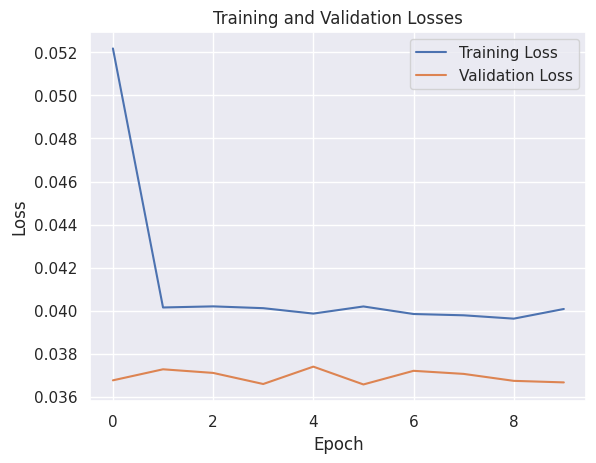

In [25]:
# Plot learning curves
plt.figure()
plt.plot(regre_history.history['loss'], label='Training Loss')
plt.plot(regre_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# Get predictions
train_preds = regre_model.predict(X_train)
val_preds = regre_model.predict(X_val)
test_preds = regre_model.predict(X_test)

4/4 [==============================] - 1s 259ms/step


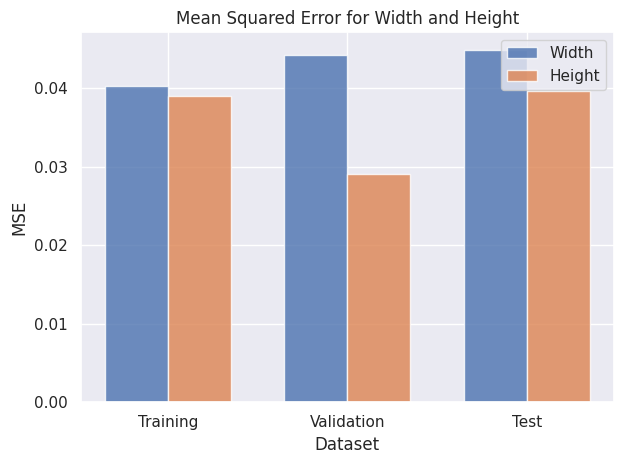

In [29]:
mse_data = {
    "Training": np.mean(np.square(train_preds - y_train), axis=0).to_dict(),
    "Validation": np.mean(np.square(val_preds - y_val), axis=0).to_dict(),
    "Test": np.mean(np.square(test_preds - y_test), axis=0).to_dict()
}

# Prepare data for plotting
width_mse = [mse_data[dataset]['width'] for dataset in mse_data.keys()]
height_mse = [mse_data[dataset]['height'] for dataset in mse_data.keys()]

# Set the bar width and positions
bar_width = 0.35
index = np.arange(len(mse_data))

# Create the bars
fig, ax = plt.subplots()
bar1 = ax.bar(index, width_mse, bar_width, label='Width', alpha=0.8)
bar2 = ax.bar(index + bar_width, height_mse, bar_width, label='Height', alpha=0.8)

# Label the chart
ax.set_xlabel('Dataset')
ax.set_ylabel('MSE')
ax.set_title('Mean Squared Error for Width and Height')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(mse_data.keys())
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


# 4. Improving the Model

In [31]:
base_model = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))

# Create custom model
tuned_model = models.Sequential()

# Freeze the layers from VGG-16 model and add the first two blocks
for layer in base_model.layers[:7]:
    layer.trainable = False
    tuned_model.add(layer)

tuned_model.add(layers.Flatten())
tuned_model.add(layers.BatchNormalization())
tuned_model.add(layers.Dense(128, activation='tanh'))
tuned_model.add(layers.Dropout(0.2))
tuned_model.add(layers.Dense(64, activation='tanh'))
tuned_model.add(layers.BatchNormalization())
tuned_model.add(layers.Dense(32, activation='tanh'))
tuned_model.add(layers.Dropout(0.2))
tuned_model.add(layers.Dense(2, activation='sigmoid'))  # 2 outputs for normalized height and width


# Compile the model
tuned_model.compile(optimizer='adam', 
                loss='mean_squared_error')

In [32]:
tuned_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0         
                                                                 
 flatten_3 (Flatten)         (None, 131072)           

In [33]:
tuned_history = tuned_model.fit(X_train,
                                y_train,
                                epochs=10,
                                batch_size=32,
                                validation_data=(X_val, y_val))

Epoch 1/10
25/25 [==============================] - 20s 779ms/step - loss: 0.1132 - val_loss: 0.0667
Epoch 2/10
25/25 [==============================] - 19s 776ms/step - loss: 0.0791 - val_loss: 0.0332
Epoch 3/10
25/25 [==============================] - 19s 764ms/step - loss: 0.0613 - val_loss: 0.0318
Epoch 4/10
25/25 [==============================] - 18s 733ms/step - loss: 0.0455 - val_loss: 0.0181
Epoch 5/10
25/25 [==============================] - 19s 761ms/step - loss: 0.0304 - val_loss: 0.0145
Epoch 6/10
25/25 [==============================] - 18s 740ms/step - loss: 0.0213 - val_loss: 0.0153
Epoch 7/10
25/25 [==============================] - 18s 727ms/step - loss: 0.0209 - val_loss: 0.0153
Epoch 8/10
25/25 [==============================] - 18s 734ms/step - loss: 0.0162 - val_loss: 0.0116
Epoch 9/10
25/25 [==============================] - 19s 762ms/step - loss: 0.0156 - val_loss: 0.0094
Epoch 10/10
25/25 [==============================] - 19s 767ms/step - loss: 0.0135 - val_lo

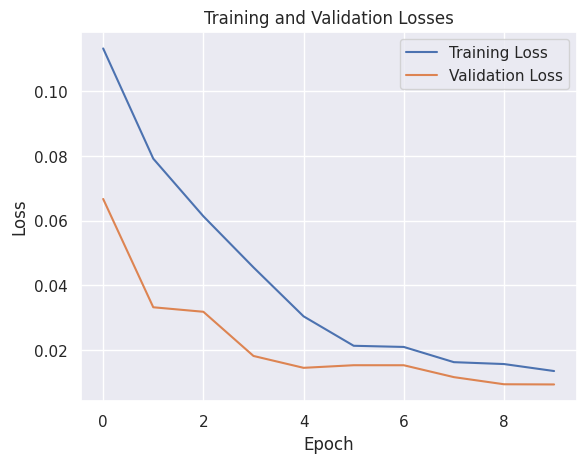

In [36]:
# Plot learning curves
plt.figure()
plt.plot(tuned_history.history['loss'], label='Training Loss')
plt.plot(tuned_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
# Get predictions
train_preds = tuned_model.predict(X_train)
val_preds = tuned_model.predict(X_val)
test_preds = tuned_model.predict(X_test)

4/4 [==============================] - 1s 295ms/step


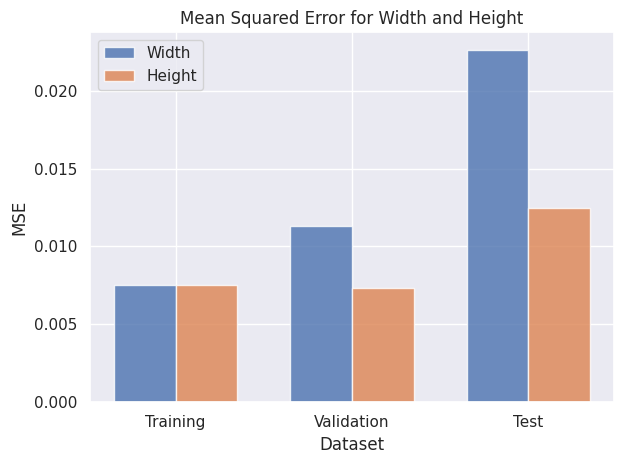

In [35]:
mse_data = {
    "Training": np.mean(np.square(train_preds - y_train), axis=0).to_dict(),
    "Validation": np.mean(np.square(val_preds - y_val), axis=0).to_dict(),
    "Test": np.mean(np.square(test_preds - y_test), axis=0).to_dict()
}

# Prepare data for plotting
width_mse = [mse_data[dataset]['width'] for dataset in mse_data.keys()]
height_mse = [mse_data[dataset]['height'] for dataset in mse_data.keys()]

# Set the bar width and positions
bar_width = 0.35
index = np.arange(len(mse_data))

# Create the bars
fig, ax = plt.subplots()
bar1 = ax.bar(index, width_mse, bar_width, label='Width', alpha=0.8)
bar2 = ax.bar(index + bar_width, height_mse, bar_width, label='Height', alpha=0.8)

# Label the chart
ax.set_xlabel('Dataset')
ax.set_ylabel('MSE')
ax.set_title('Mean Squared Error for Width and Height')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(mse_data.keys())
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


# 5. Discussion

Looking at the results from 3.1, we see an obvious case of overfitting. The model managed to reach and accuracy of almost 100% on the training dataset, but barely reached 70% on the validation dataset. This is a clear sign of overfitting. To solve this, we can use data augmentation. This is a technique that allows us to generate more data from the existing data. This is done by applying random transformations to the images, such as rotation, scaling, translation, etc. This will allow the model to learn more general features, and not just the features of the training dataset.<br>
Another solution for this problem is by lowering the complexity of the model. VGG16 is a very complex model, and it is not necessary to use such a complex model for this task. It's better to use a simpler model or apply regularization to the model.

Looking at the results from 3.2, we see that the model perfroms better on the validation dataset than the training dataset, but it performs worse on the test set. By looking at the graph for the validation and train losses we see that the model isn't learning much from the data. The curve is almost flat for the validation dataset and after the first epoch it becomes almost flat for the training dataset. This was more extreme when I used the relu activation function. The tanh activation function made this problem less extreme, but it still exists. This is a sign of underfitting. We can use a simpler model and apply data augmentation or apply regularization to the model.

Looking at the results from 4, we see that regularization improved the accuracy of our model. The loss for the test set was reduced to (>0.025, >0.015) from (<0.04, 0.04). This was achieved by only applying batch normalization and dropout to the model. We can further improve the model by applying data augmentation and using a simpler model and perfroming hyperparameter tuning.